<a href="https://colab.research.google.com/github/AlenZhang-Dev/Learning-Records/blob/master/Machine%20Learning/Deep%20Learning%20with%20Python/3.5%20%E5%A4%9A%E5%88%86%E7%B1%BB%E9%97%AE%E9%A2%98%E3%80%90%E6%96%B0%E9%97%BB%E5%88%86%E7%B1%BB%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多分类问题（Multiclass Classification）

本节构建一个网络，将路透新闻划分为46个互斥的主题。因为每个数据点只能划分到一个类别，这是单标签、多分类的问题；如果每个数据点能够划分到多个类别，那么这是一个多标签，多分类的问题。使用的数据集是路透社数据集，伯阿汉许多短新闻及其对应主题，是一个简单的，广泛使用的文本分类集。包括46个不同的主题：某些主题的样本更多，但训练集中每个主题至少有10个样本。

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

num_words将数据限定为前10000个最常出现的单词，我们有8982个训练样本和2246个测试样本。

In [2]:
len(train_data)
len(test_data)

2246

## 数据准备


1. 与上一个例子类似，将数据向量化

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

2. 将标签转换为整数张量，使用one-hot编码，one-hot是分类数据广泛使用的一种格式，也叫做分类编码（categorical encoding）。

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

注：Keras内置的方法可以实现这个操作。

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 模型定义

对于前面用过的Dense层堆叠，每层只能访问上一层输出的信息。如果某一层丢失了与分类信息相关的一些信息，那么这些信息无法被后续的层找回，因此在这个例子中使用64维空间进行训练。

*   网络的最后一层大小为46的Dense层。对于每个输入样本，都会输出一个46维的向量。这个向量的每个元素代表不同的输出类别。

*   最后一层采用softmax激活。网络将输出在46个不同输出类别上的概率分布，对于每一个输入样本，网络都会输出一个46维向量，46个概率总和为1。





In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

编译模型
对于本例子，最好使用分类交叉熵(categorical_crossentropy)，用于衡量两个概率分布之间的距离，这里两个概率分布分别是网络输出的概率分布和标签的真实分布。通过将这两个分布距离最小化，训练网络可使输出结果尽可能接近真实标签。

In [7]:
 model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 验证方法


在训练数据中留出1000个样本作为验证集。

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 0.0722 - accuracy: 0.5254 - val_loss: 0.0478 - val_accuracy: 0.6740
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 0.0412 - accuracy: 0.7115 - val_loss: 0.0396 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 0.0320 - accuracy: 0.7824 - val_loss: 0.0344 - val_accuracy: 0.7730
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.0262 - accuracy: 0.8198 - val_loss: 0.0328 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.0217 - accuracy: 0.8561 - val_loss: 0.0310 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.0178 - accuracy: 0.8836 - val_loss: 0.0297 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.0149 - accuracy: 0.9040 - val_loss: 0.0306 - val_accuracy: 0.8040
Epoch 8/20
16

绘制训练和验证损失

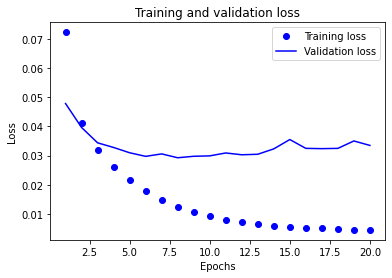

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

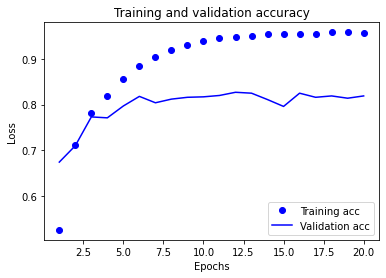

In [11]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

根据以上训练反馈，修改训练轮次，从头开始重新训练一个模型。并在测试集还上进行评估。

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 52ms/step - loss: 2.4449 - accuracy: 0.5274 - val_loss: 1.6425 - val_accuracy: 0.6480
Epoch 2/8
16/16 [==============================] - 1s 41ms/step - loss: 1.3537 - accuracy: 0.7132 - val_loss: 1.2850 - val_accuracy: 0.7080
Epoch 3/8
16/16 [==============================] - 1s 39ms/step - loss: 1.0194 - accuracy: 0.7795 - val_loss: 1.1131 - val_accuracy: 0.7580
Epoch 4/8
16/16 [==============================] - 1s 39ms/step - loss: 0.8043 - accuracy: 0.8309 - val_loss: 1.0237 - val_accuracy: 0.7820
Epoch 5/8
16/16 [==============================] - 1s 39ms/step - loss: 0.6496 - accuracy: 0.8664 - val_loss: 0.9631 - val_accuracy: 0.7980
Epoch 6/8
16/16 [==============================] - 1s 39ms/step - loss: 0.5155 - accuracy: 0.8963 - val_loss: 0.9216 - val_accuracy: 0.8070
Epoch 7/8
16/16 [==============================] - 1s 39ms/step - loss: 0.4160 - accuracy: 0.9158 - val_loss: 0.9038 - val_accuracy: 0.8130
Epoch 8/8
71/71 [===

In [13]:
results

[0.9641938209533691, 0.7862867116928101]

对于平衡的二分类问题，完全随机的分类器能够到50%左右的精度，但在这个例子中，完全随机的精度约为19%，所以上述结果相比该基准而言非常不错。

In [14]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19545859305431879

## 在新数据上生成预测结果

验证模型实例的predict方法返回了在46个主题上的概率分布。对所有测试数据生成主题推测。

In [15]:
predictions = model.predict(x_test)

prediction 中每个元素都是长度为46的向量model.predict(x_test)

In [16]:
predictions[0].shape

(46,)

该向量所有元素和为1

In [17]:
np.sum(predictions[0])

0.9999999

最大元素就是预测类别，即概率最大的类别

In [18]:
np.argmax(predictions[0])

3

## 中间层维度足够大的重要性

因为最终输出是46维的，最终输出不应该比46小太多。如果中间维度远远小于46，造成信息瓶颈，会产生什么结果。



In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 18ms/step - loss: 2.9614 - accuracy: 0.3696 - val_loss: 2.2487 - val_accuracy: 0.5920
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.8082 - accuracy: 0.6163 - val_loss: 1.5554 - val_accuracy: 0.6330
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3488 - accuracy: 0.6579 - val_loss: 1.3737 - val_accuracy: 0.6700
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1502 - accuracy: 0.7250 - val_loss: 1.3203 - val_accuracy: 0.7030
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0224 - accuracy: 0.7571 - val_loss: 1.2850 - val_accuracy: 0.7130
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9222 - accuracy: 0.7809 - val_loss: 1.2655 - val_accuracy: 0.7250
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.8404 - accuracy: 0.7980 - val_loss: 1.2810 - val_accuracy: 0.7260
Epoch 8/20
63

可以发现验证精度相较上一轮下降了很多。

## 进一步实验
* 尝试使用更多或者更少的隐藏单元
* 使用一个或三个隐藏层

## 小结
* 如果要对N个类别的数据进行分类，网络的最后一层应该是大小为N的Dense层。
* 对于单标签、多分类问题，网络最后一层应该使用softmax激活，这样可以输出在N个输出类别上的概率分布。
* 这种问题损失函数几乎总是应该使用交叉熵。他将网络输出的概率分布与目标真实分布之间的距离最小化。
* 处理多分类问题的标签有两种方法。
  * 通过分类编码（one-hot）对标签进行编码，然后使用categorial_crossentropy作为损失函数。
  * 将标签编码为整数，然后使用sparse_catagorical_crossentropy损失函数。
* 如果需要将数据划分到许多类别中，应该避免使用太小的中间层，以免在网络中造成信息瓶颈。